# Employee Attrition Prediction

In this project we are going to predict --> which employees in a company are more willingly to leave the company

steps:
    Problem statement
    import the libraries and dataset
    FE
    EDA
    FI
    splitting our dataset into train and test
    scailing
    ml model --> classification algorithms
    dl model --> ANN

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
emp_df = pd.read_csv('Human_Resources.csv')

In [3]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Attrition -> Target Variable

In [4]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Problem Statement:
    datascientist -> HR team provided you the past data about employees who left and stayed.


* You work as a data scientist at this multinational corporation and the HR team has collected some
data for you on their employees.

* They will be asking you to predict which employees are more likely to quit.

* So the HR team collected information about 

1.Job Involvement - Are they involved in their jobs or not 

2.About their education - Do they have a bachelor's degree and master's degree PHC for example.

3.Job Satisfaction - Are they satisfied for example or not with performance the 

4.Relationship Satisfaction with their with
their team and with their manager as well 

5.and their Work Life Balance as well.

there are almost 35 factors/features the HR team actually provided us to predict the employee retention.

In [5]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp_df.shape

(1470, 35)

In [7]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
emp_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Value_Counts()

In [11]:
for col in list(emp_df):
    print(col)
    print(emp_df[col].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [12]:
for col in list(emp_df):
    print(col, emp_df[col].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


### Missing value

In [13]:
emp_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

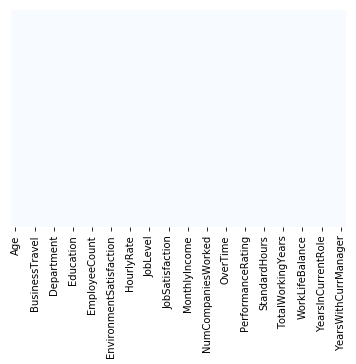

In [14]:
sns.heatmap(emp_df.isnull(),yticklabels = False, cbar = False, cmap = 'Blues')

### Exploratory Data Analysis

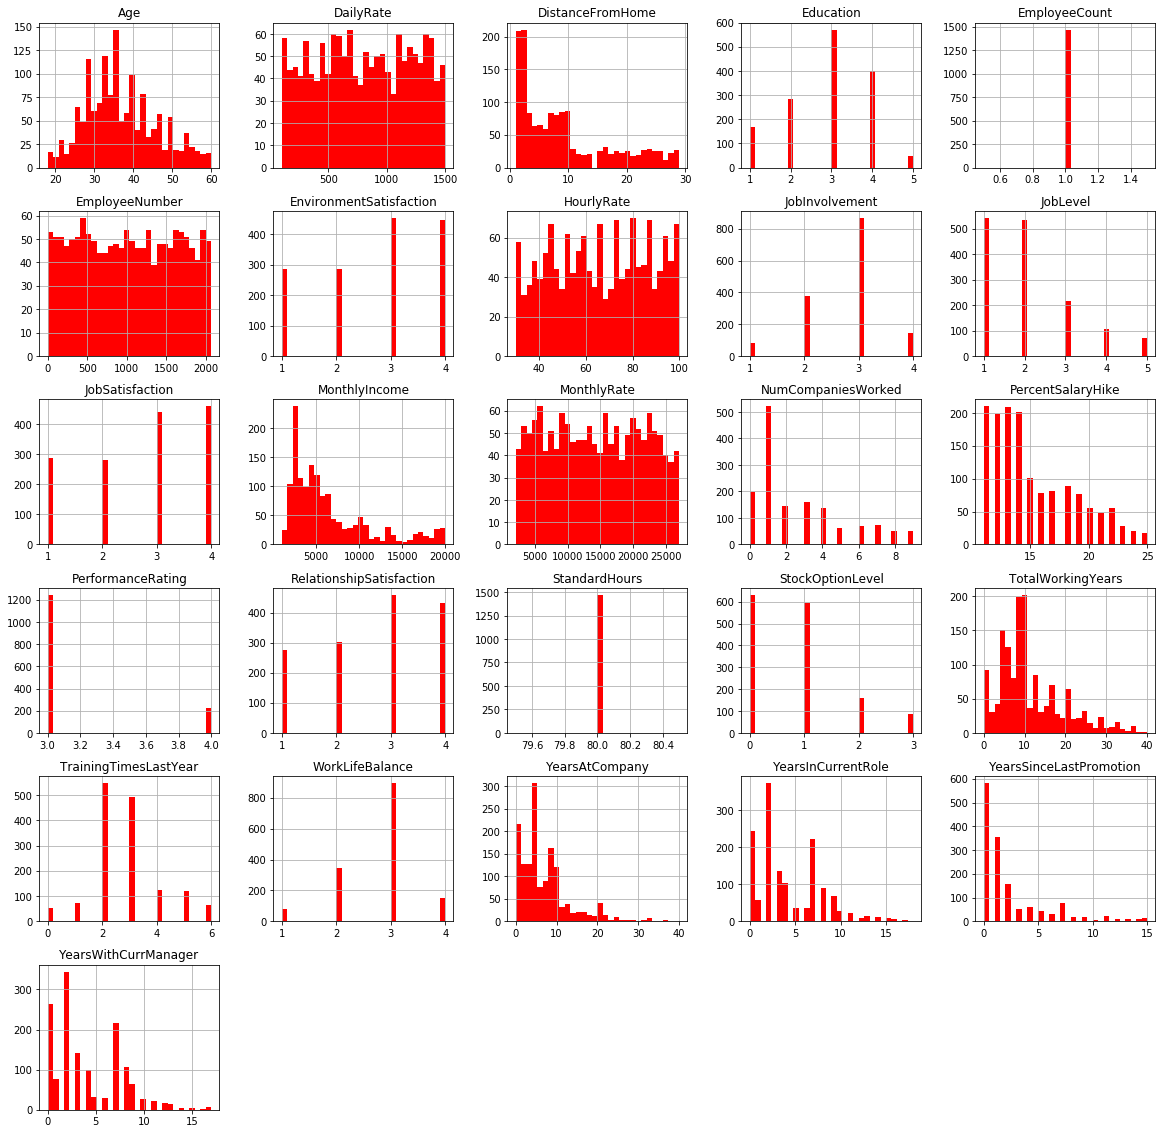

In [15]:
emp_df.hist(bins=30, figsize = (20,20), color = 'r')
plt.show()

### Drop the unwanted columns

In [16]:
emp_df.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'], axis=1, inplace=True)

In [17]:
emp_df.shape

(1470, 31)

In [18]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [19]:
#out of 6 employees 1 employee left the company

In [20]:
left_df = emp_df[emp_df['Attrition'] == 'Yes']
stayed_df = emp_df[emp_df['Attrition'] == 'No']

In [21]:
left_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [22]:
stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Attrition using Count Plot 

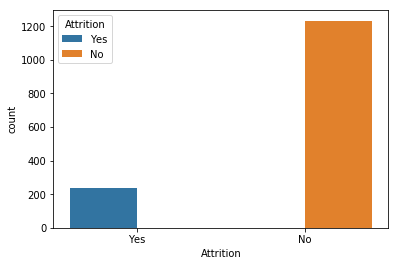

In [23]:
sns.countplot(x='Attrition',data=emp_df,hue='Attrition')

### Attrition using Pie Chart

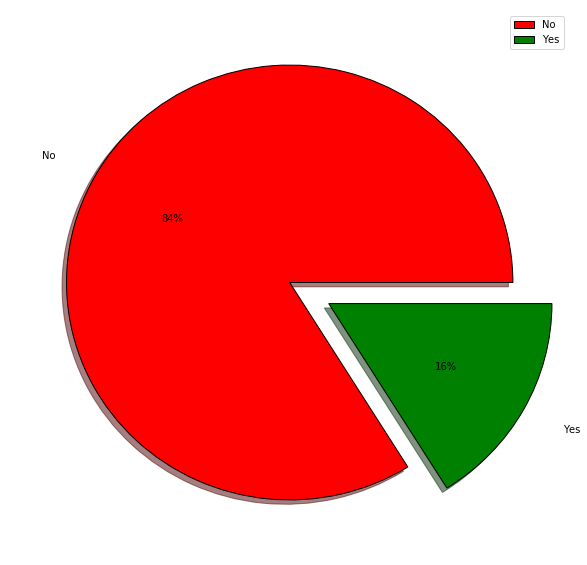

In [24]:
x = emp_df.Attrition.value_counts()

plt.figure(figsize=(10,10))

plt.pie(x,labels=x.index,colors=['red', 'green'],
       wedgeprops={'edgecolor':'black'},
       autopct='%1.0f%%',
       explode=[0,0.2],
       labeldistance=1.2,
       shadow=True)

plt.legend()
plt.show()

### "Attrition" with respect to "Age"

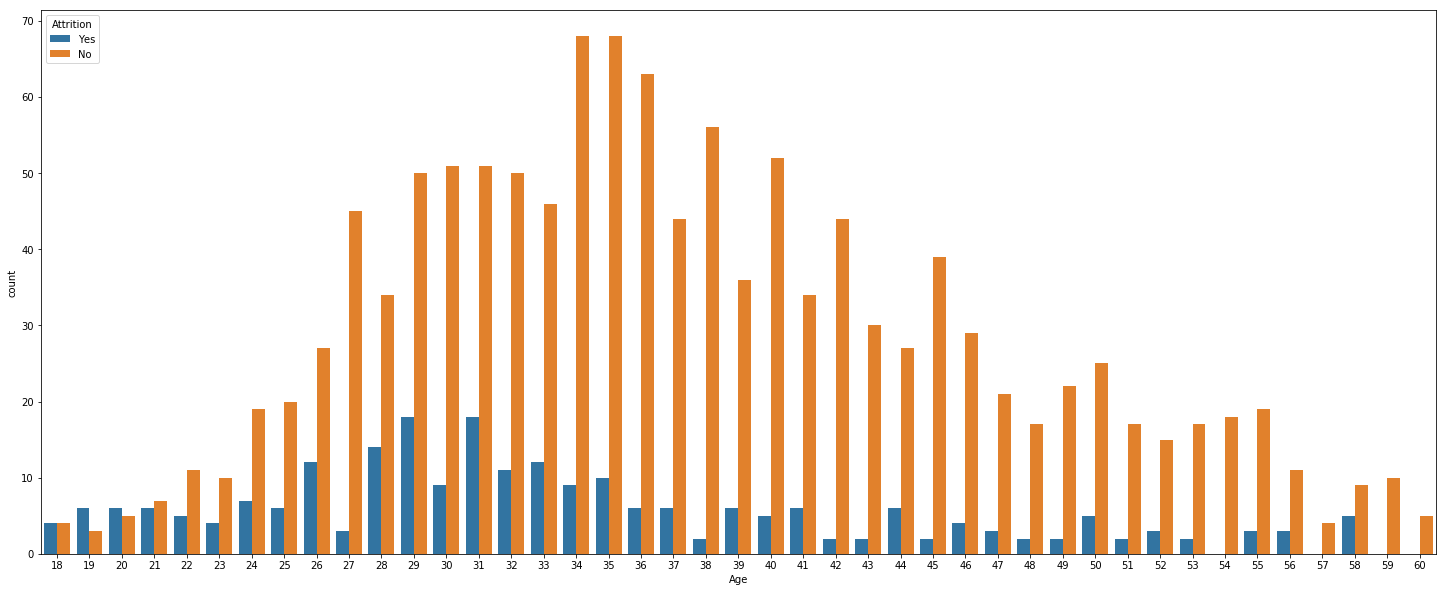

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',data = emp_df, hue='Attrition')
plt.show()

In [26]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### "Attrition" w.r.t "JobRole", "JobInvolvement", "JobLevel", and "MaritalStatus"

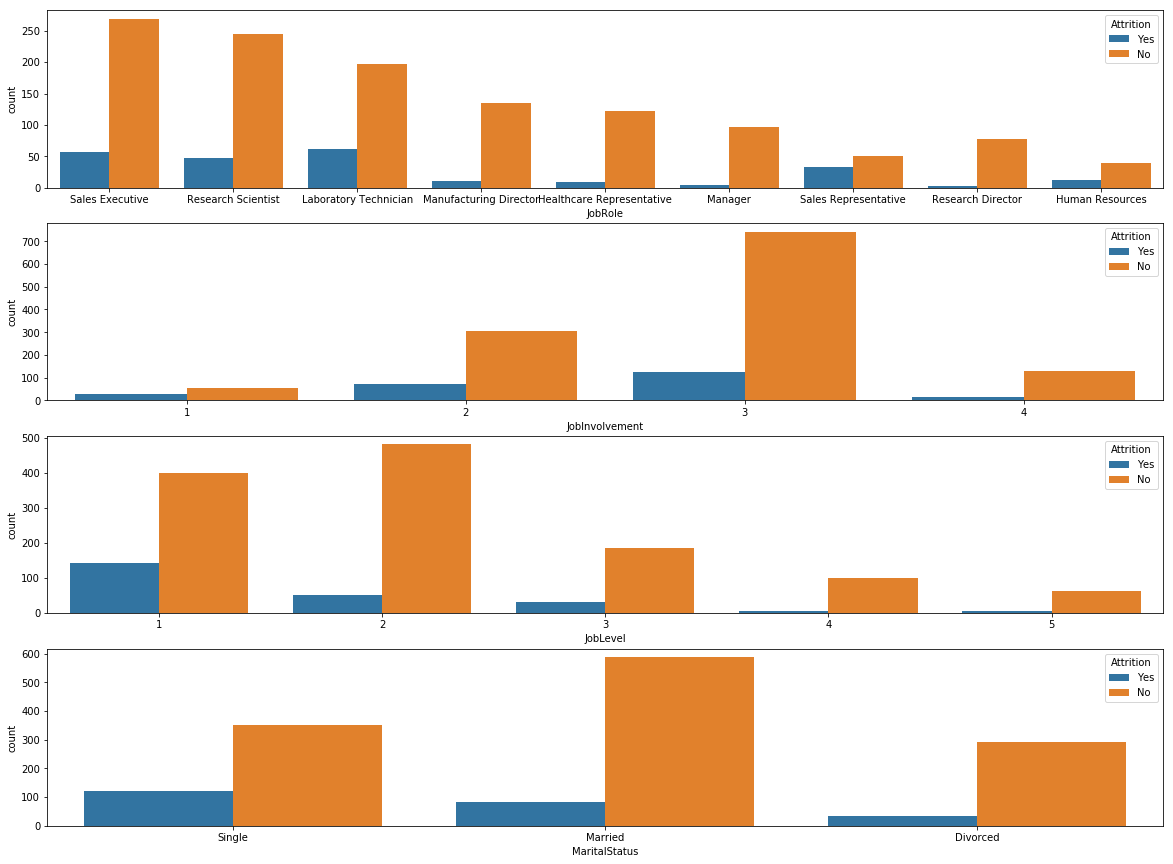

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(411)
sns.countplot(x='JobRole',data=emp_df,hue='Attrition')
plt.subplot(412)
sns.countplot(x='JobInvolvement',data=emp_df,hue='Attrition')
plt.subplot(413)
sns.countplot(x='JobLevel',data=emp_df,hue='Attrition')
plt.subplot(414)
sns.countplot(x='MaritalStatus',data=emp_df,hue='Attrition')

plt.show()

### KDE Plots on left and stayed employess w.r.t "DistanceFromHome"

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Distance From Home')

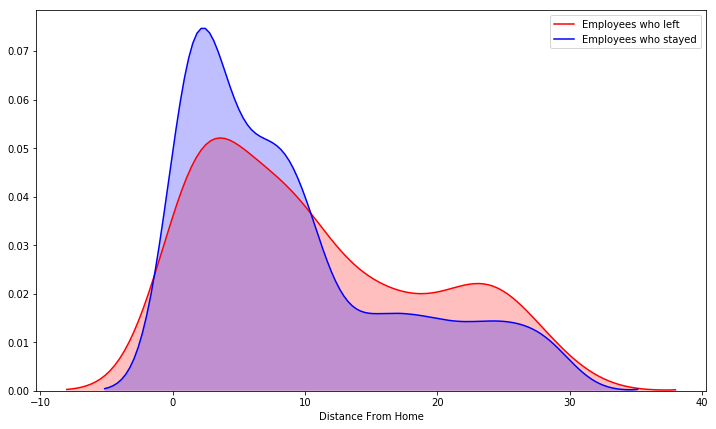

In [28]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left',color='r', shade=True)
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who stayed',color='b', shade=True)

plt.xlabel('Distance From Home')

### KDE Plots on left and stayed employess w.r.t "TotalWorkingYears"

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Total Working Years')

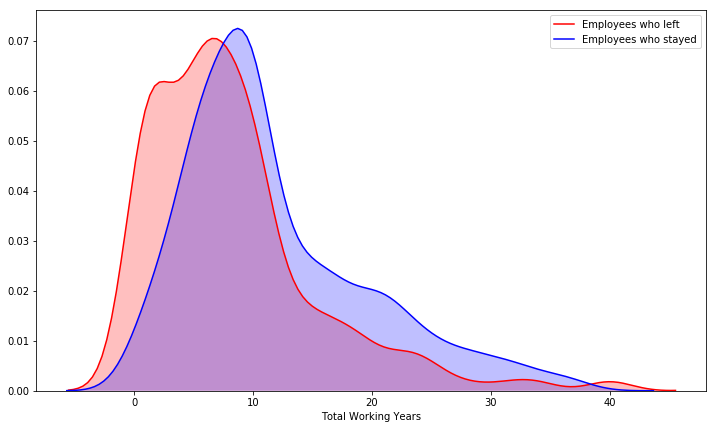

In [29]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label='Employees who left',color='r', shade=True)
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employees who stayed',color='b', shade=True)

plt.xlabel('Total Working Years')

### Boxplot to compare salary difference b/w Male and Female

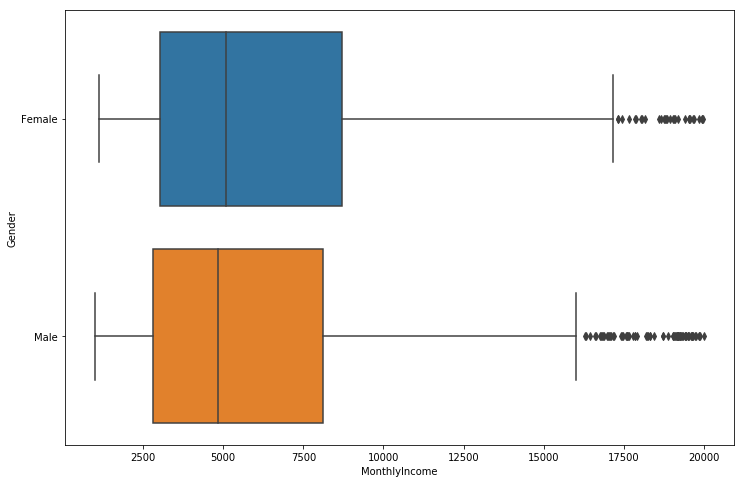

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='MonthlyIncome', y='Gender', data=emp_df)

### Box Plots w.r.t "MonthlyIncome" and "JobRole"

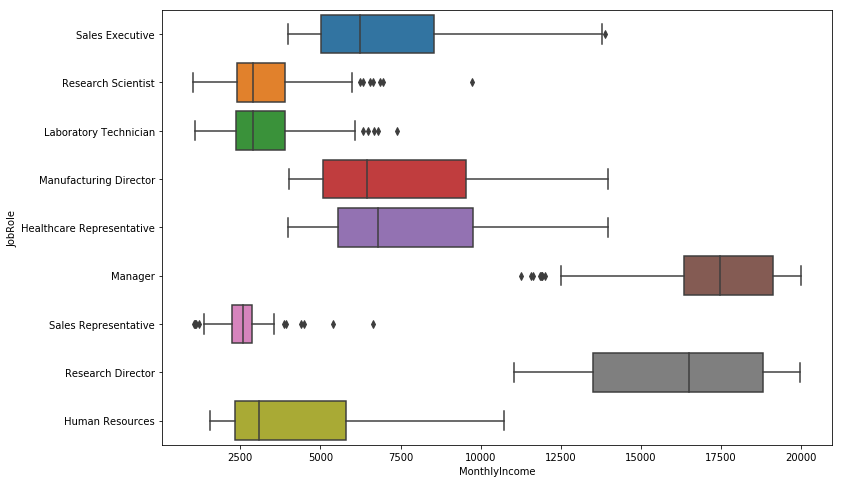

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=emp_df)

### Heat Map to find the correlation b/w columns

In [32]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
emp_df["Attrition"] = le.fit_transform(emp_df["Attrition"])

In [35]:
emp_df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [36]:
emp_df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


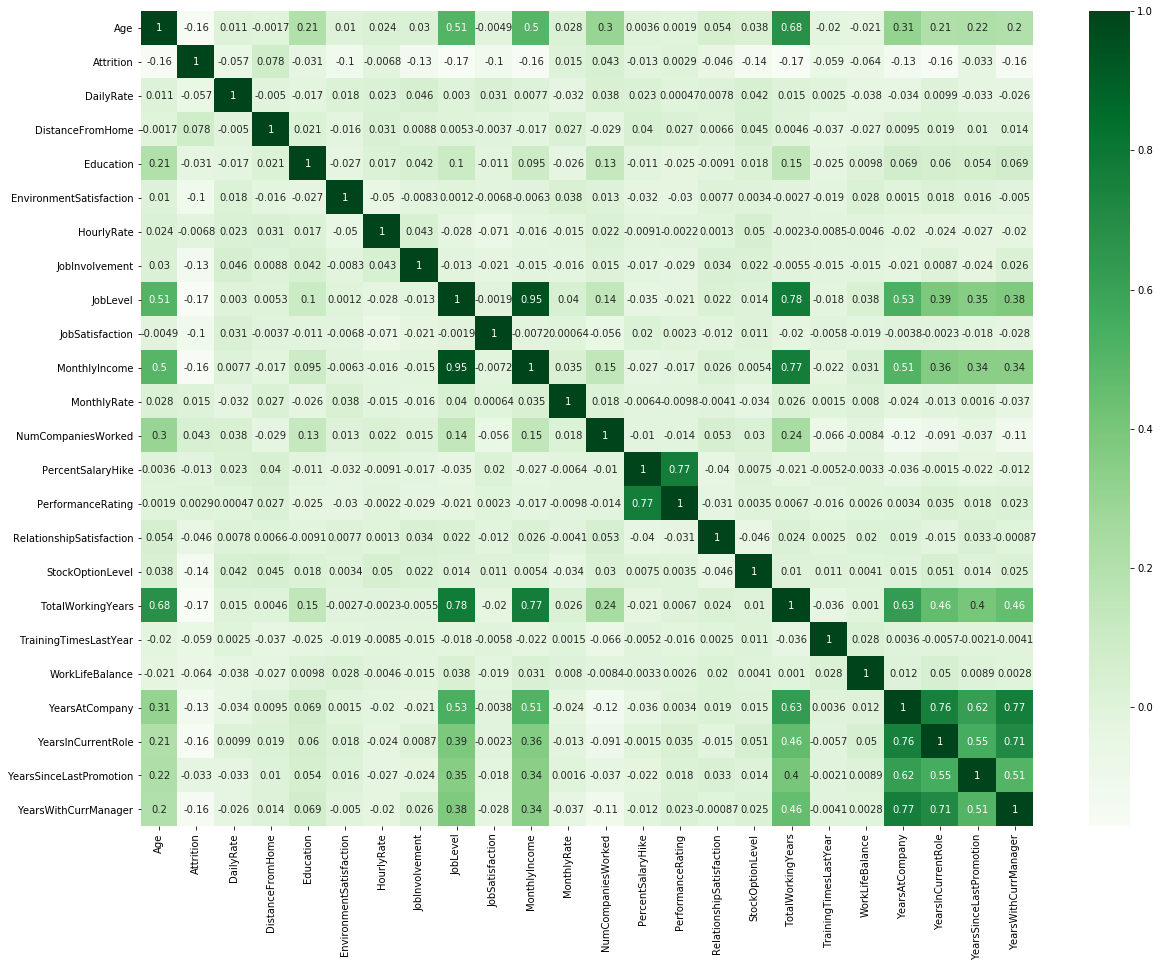

In [37]:
#heatmap
plt.figure(figsize = (20,15))
sns.heatmap(emp_df.corr(),cmap='Greens',annot=True)

### Encoding - Coverting Categorical data into Numerical Data

In [38]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [39]:
emp_df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [40]:
emp_df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [41]:
emp_df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [42]:
emp_df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [43]:
emp_df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

#### OneHotEncoding

In [44]:
cat = emp_df[["BusinessTravel", "Department", "JobRole", "MaritalStatus", "EducationField"]]

In [45]:
cat = pd.get_dummies(cat, drop_first=True)

In [46]:
cat.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


#### LabelEncoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
emp_df["Gender"] = le.fit_transform(emp_df["Gender"])
emp_df["OverTime"] = le.fit_transform(emp_df["OverTime"])

In [50]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [51]:
numerical = emp_df[['Age', 'Attrition', 'DailyRate', 
       'DistanceFromHome', 'Education', 
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [52]:
emp_df = pd.concat([cat,numerical],axis=1)

In [53]:
emp_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,0,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,0,0,0,0,0,1,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,1,0,0,0,0,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,1,0,0,0,0,...,3,4,1,6,3,3,2,2,2,2


In [54]:
emp_df.dtypes

BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
JobRole_Human Resources              uint8
JobRole_Laboratory Technician        uint8
JobRole_Manager                      uint8
JobRole_Manufacturing Director       uint8
JobRole_Research Director            uint8
JobRole_Research Scientist           uint8
JobRole_Sales Executive              uint8
JobRole_Sales Representative         uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
EducationField_Life Sciences         uint8
EducationField_Marketing             uint8
EducationField_Medical               uint8
EducationField_Other                 uint8
EducationField_Technical Degree      uint8
Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education  

### Feature Importance

In [55]:
x = emp_df.drop('Attrition', axis=1)
y = emp_df["Attrition"]

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
model.feature_importances_

array([0.02028763, 0.01274846, 0.00917713, 0.00596967, 0.00659449,
       0.01855992, 0.0048777 , 0.02031864, 0.00159869, 0.01191927,
       0.01736254, 0.01275057, 0.00922532, 0.04267667, 0.00902403,
       0.01387106, 0.0137576 , 0.00999125, 0.01313086, 0.0500015 ,
       0.02469646, 0.03952124, 0.01700252, 0.03456994, 0.01916485,
       0.01871571, 0.02388621, 0.04244967, 0.0361321 , 0.02594907,
       0.02259242, 0.03635524, 0.06057407, 0.02711483, 0.01053742,
       0.03313147, 0.02567944, 0.02859178, 0.02024928, 0.04089943,
       0.02980929, 0.02197432, 0.02826264, 0.02829759])

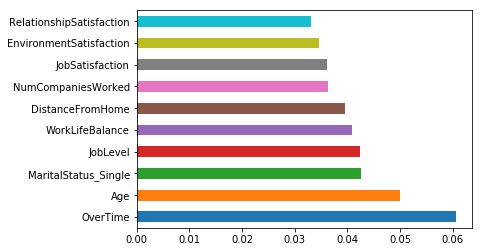

In [58]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

### Splitting the Dataset into training and test 

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [60]:
x_train.shape

(1102, 44)

In [61]:
x_test.shape

(368, 44)

### Feature Scailing - Normarlization

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [63]:
x_test

array([[0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.47058824, 0.26666667,
        0.53333333],
       [0.        , 1.        , 1.        , ..., 0.11764706, 0.13333333,
        0.13333333],
       ...,
       [0.        , 1.        , 0.        , ..., 0.41176471, 0.06666667,
        0.46666667],
       [0.        , 1.        , 0.        , ..., 0.47058824, 0.13333333,
        0.2       ],
       [1.        , 0.        , 1.        , ..., 0.11764706, 0.06666667,
        0.13333333]])

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
y_pred = model.predict(x_test)

In [66]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Accuracy Score, Confusion Matrix & Classification Report

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
alr = accuracy_score(y_pred, y_test)

In [69]:
alr

0.8777173913043478

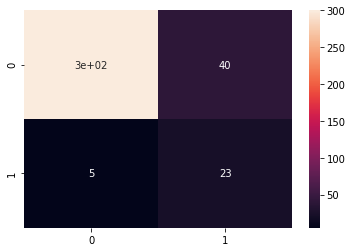

In [70]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [71]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       305
          1       0.82      0.37      0.51        63

avg / total       0.87      0.88      0.86       368



### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
y_pred = model.predict(x_test)

In [74]:
arfc = accuracy_score(y_pred, y_test)

In [75]:
arfc

0.8260869565217391

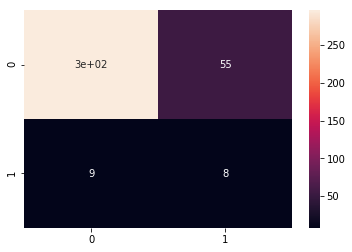

In [76]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [77]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       305
          1       0.47      0.13      0.20        63

avg / total       0.78      0.83      0.78       368



### SVM using Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [79]:
svc  = SVC()

parameters = {"kernel":['linear', 'poly', 'rbf'], 
             'C':[0.001,0.01,0.1,1,10], 'degree':[1,2,3,4,5,6,7], 
              'gamma':[0.001,0.1,1,2,5,10,100]}

gv = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')
gv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2, 3, 4, 5, 6, 7], 'gamma': [0.001, 0.1, 1, 2, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
gv.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}

In [81]:
svc  = SVC(kernel='poly', C= 0.01, degree= 1, gamma= 100)

In [82]:
svc.fit(x_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
y_pred = svc.predict(x_test)

In [84]:
asvm = accuracy_score(y_pred, y_test)

In [85]:
asvm

0.8804347826086957

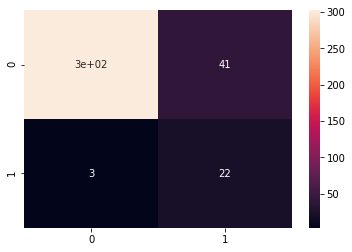

In [86]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [87]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.99      0.93       305
          1       0.88      0.35      0.50        63

avg / total       0.88      0.88      0.86       368



### K Nearest Neighbors Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [89]:
y_pred = knn.predict(x_test)

In [90]:
aknn = accuracy_score(y_pred, y_test)

In [91]:
aknn

0.8260869565217391

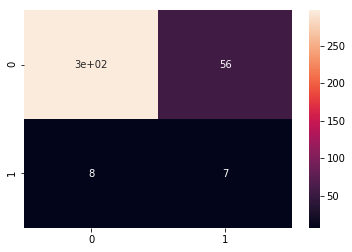

In [92]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [93]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       305
          1       0.47      0.11      0.18        63

avg / total       0.78      0.83      0.78       368



In [94]:
pd.DataFrame({'model':['Logistic Regression','Support Vector Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors Classifier'], 
              'accuracy Score':[alr, asvm, arfc, aknn]})

,model,accuracy Score
0,Logistic Regression,0.877717
1,Support Vector Classifier,0.880435
2,Random Forest Classifier,0.826087
3,K-Nearest Neighbors Classifier,0.826087


### Deep Learning Model - ANN

In [95]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [96]:
import tensorflow as tf

In [97]:
tf.__version__

'2.4.1'

In [104]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [106]:
# model.summary()

In [107]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [108]:
epochs_hist = model.fit(x_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 4s 8ms/step - loss: 0.4655 - accuracy: 0.8367
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3407 - accuracy: 0.8615
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2703 - accuracy: 0.9090
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2681 - accuracy: 0.9013
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.9047
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.9004
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2129 - accuracy: 0.9331
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1594 - accuracy: 0.9458
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1360 - accuracy: 0.9488
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0999 - accuracy: 0.9647
Epoch 11/

23/23 [==============================] - 0s 7ms/step - loss: 5.3932e-06 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 8ms/step - loss: 6.0503e-06 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 8ms/step - loss: 6.3336e-06 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 7ms/step - loss: 5.0270e-06 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 6ms/step - loss: 5.8802e-06 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 6ms/step - loss: 4.3640e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 7ms/step - loss: 4.3217e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 6ms/step - loss: 4.0383e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 7ms/step - loss: 4.2136e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 4.2

In [109]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

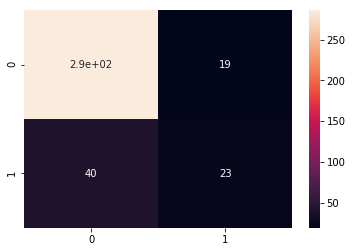

In [111]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [112]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91       305
          1       0.55      0.37      0.44        63

avg / total       0.82      0.84      0.83       368



### Thank You !